In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/TechnologyIndex.csv')

# 1 Remove "$" symbol from the entire data:

In [3]:
df=df.replace('\$','',regex=True)
df.head()

,Rank,Country,iPhone,Android,MacBook,Windows Powered,PS4,Xbox one,iPad mini,Samsung tablet,40 inch smart TV,Apple Watch,Brand headphone,hard drive 2TB,Portable charger,Printer
0,1,Kuwait,641.50,539.18,795.38,528.34,315.83,418.50,242.90,250.98,383.60,242.90,196.95,89.03,2.44,52.36
1,2,Saudi Arabia,513.86,699.61,"1,054.98",686.88,317.86,254.24,380.47,152.44,406.93,381.48,338.22,114.27,4.83,30.03
2,3,Malaysia,532.06,631.66,"1,010.31","1,022.67",299.83,355.47,232.87,354.99,324.87,248.43,175.48,116.16,11.41,108.69
3,4,Canada,555.25,625.04,"1,118.10","1,081.40",274.25,233.14,237.34,392.89,364.30,259.21,159.71,87.12,9.24,57.13
4,5,United Arab Emirates,498.25,592.31,"1,073.30","1,026.68",324.72,285.72,259.71,311.71,467.68,285.71,181.73,84.49,10.13,95.93


In [4]:
#Remove comma
df=df.replace('\,','',regex=True)
#Datatype change
df.iloc[:,2:15] = df.iloc[:,2:15].apply(pd.to_numeric)
df.dtypes

Rank                  int64
Country              object
iPhone              float64
Android             float64
MacBook             float64
Windows Powered     float64
PS4                 float64
Xbox one            float64
iPad mini           float64
Samsung tablet      float64
40 inch smart TV    float64
Apple Watch         float64
Brand headphone     float64
hard drive 2TB      float64
Portable charger    float64
Printer              object
dtype: object

# 4 Use dataframe slicing to return countries : "Spain, Pakistan, Colombia, Germany" with devices : "Xbox one,Portable charger".

In [5]:
spcg = df[df['Country'].isin(['Spain', 'Pakistan', 'Colombia', 'Germany'])] 
xbox_portablecharger = spcg[['Country','Xbox one','Portable charger']]
xbox_portablecharger

,Country,Xbox one,Portable charger
12,Spain,447.16,3.71
13,Pakistan,315.28,7.12
14,Colombia,282.19,43.12
15,Germany,263.94,10.59


# 6 Trend followed between "iPhone and Android"


In [6]:
# Select iPhone and Android columns from spgd dataframe and save it as new dataframe named android_iphone
spcg = spcg.set_index('Country')
android_iphone = spcg[['iPhone','Android']]
android_iphone

,iPhone,Android
Country,,
Spain,686.14,634.83
Pakistan,537.97,720.33
Colombia,655.11,943.57
Germany,613.74,719.74


In [7]:
#remove comma from android_iphone dataframe and then convert its columns into float
android_iphone=android_iphone.replace('\,','',regex=True)
android_iphone = android_iphone.astype(float)
android_iphone.dtypes

iPhone     float64
Android    float64
dtype: object

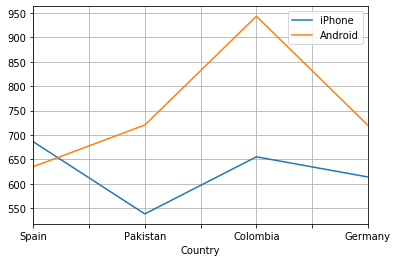

In [8]:
#plot the graph with countries on X axis and Sale total (in $) on Y axis
android_iphone.plot(grid = True)

# 3 What device has the most unpredictable trend?

In [9]:
X=df.iloc[:,0]
Y=df.iloc[:,1]

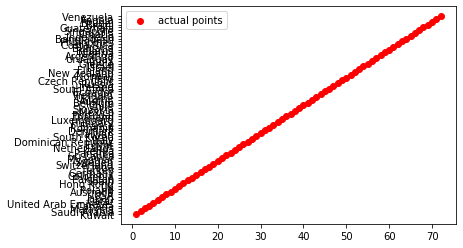

In [10]:
plt.scatter(X,Y,color = 'r',label = 'actual points')
plt.legend()
plt.show()

# 5 Country earning most and least by selling them

In [11]:
#add a column named sum to store the sum of all the electronics and gadgets of a row
df['Sum Total']= df.iloc[:, 2:15].sum(axis=1)
df.head()

,Rank,Country,iPhone,Android,MacBook,Windows Powered,PS4,Xbox one,iPad mini,Samsung tablet,40 inch smart TV,Apple Watch,Brand headphone,hard drive 2TB,Portable charger,Printer,Sum Total
0,1,Kuwait,641.50,539.18,795.38,528.34,315.83,418.50,242.90,250.98,383.60,242.90,196.95,89.03,2.44,52.36,4647.53
1,2,Saudi Arabia,513.86,699.61,1054.98,686.88,317.86,254.24,380.47,152.44,406.93,381.48,338.22,114.27,4.83,30.03,5306.07
2,3,Malaysia,532.06,631.66,1010.31,1022.67,299.83,355.47,232.87,354.99,324.87,248.43,175.48,116.16,11.41,108.69,5316.21
3,4,Canada,555.25,625.04,1118.10,1081.40,274.25,233.14,237.34,392.89,364.30,259.21,159.71,87.12,9.24,57.13,5396.99
4,5,United Arab Emirates,498.25,592.31,1073.30,1026.68,324.72,285.72,259.71,311.71,467.68,285.71,181.73,84.49,10.13,95.93,5402.14


In [12]:
#Country earning least by selling them
df.min()['Country']

'Angola'

In [13]:
#Country earning most by selling them
df.max()['Country']

'Vietnam'

# 2 What is the trend followed in apple series.

In [14]:
apple_series_df = spcg[['iPhone','MacBook','iPad mini','Apple Watch']]
apple_series_df

,iPhone,MacBook,iPad mini,Apple Watch
Country,,,,
Spain,686.14,1535.94,311.64,326.37
Pakistan,537.97,1048.64,292.42,319.84
Colombia,655.11,909.56,251.01,366.83
Germany,613.74,1588.94,306.34,338.14


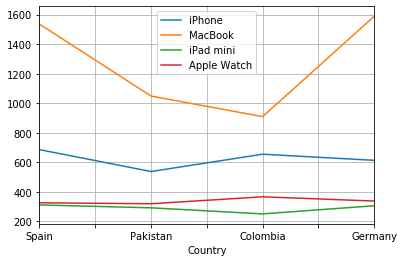

In [15]:
apple_series_df.plot(grid = True)